<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Julia lab - unconstrained optimization </font></p>

**<p><font size="5">  Kevin MICHALEWICZ </font></p>**
</p></br>
</p>
</CENTER>

----------------------------

In this lab, we want first to test the benefit of backtracking against constant stepsize for gradient or newton algorithms. Then, we will consider the behavior of conjugate-gradient and Polack-Ribière technique that work without knowledge of the Hessian matrix of the function to be optimized.

## <span style="color:#00B8DE"> I - Function plot </span>

**1)** Let us consider the function $f(x,y)=[(x-2)\sin(y-1)]^2+x^2+y^2$. 
Visualize this function on the square with vertices $(\pm 3,\pm 3)$.

## <span style="color:#00B8DE"> II - Backtracking </span>

**2)** Testing the benefit of backtracking. Calculate gradient of this function and implement gradient algorithm
for constant stepsize equal to .1 and then .01 and using backtracking. Compare the numbers of iterations necessary for convergence with initialization at point $(−4, -2)$ and residual error for the distance to the optimum smaller than $10^{−3}$.

## <span style="color:#00B8DE"> III - Gradient and Newton </span>
**3)** Implement Newton algorithm with backtracking to minimize $f(x,y)$ and compare results to gradient algorithm with backtracking.

## <span style="color:#00B8DE"> IV - Conjugate gradient </span>
**4)** Implement the conjugate-gradient algorithm and test it on a simple quadratic function $p({\bf x})=\frac 1 2 {\bf x^TAx}-{\bf x^Tb}$ with ${\bf A} = [1\; 0;0\; 5]$ and ${\bf b}=[1; 1]$.How many steps are required for convergence ? 

**5)** Consider a larger problem where 

        n = 10  # 100
        
        a = randn(n,n)
        
        A = a'*a + diagm(0=>ones(n)) # A = a'*a
        
        b = randn(n)

For $n=10,100$, check the influence of the condition number of ${\bf A}$ by adding or removing term **diagm(0=>ones(n))**.

## <span style="color:#00B8DE"> V - Polak-Ribière </span>
**6)** Considering again function, compare the performance of gradientand Polack-Ribiere algorithms with backtracking and initialization at point $(−4, -2)$. 

## <span style="color:#00B8DE"> VI - Changing initialization </span>
**7)** What occurs with these algorithms when changing intilialization to point $(-5,-0.5)$ ? Explain.


## <span style="color:#00B8DE">References (Wikipedia/book)</span>
> - [Gradient algorithm](http://en.wikipedia.org/wiki/Gradient_descent)
> - [Nonlinear conjugate gradient method and Polack-Ribière algoritm](http://en.wikipedia.org/wiki/Nonlinear_conjugate_gradient_method)
> - [Backtracking](http://www.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)  (p.464)


---------
### <span style="color:#00B8DE"> I - Function plot </span>


In [1]:
f(x,y)   = ((x-2)*sin(y-1))^2+ x^2 + y^2
∇f(x,y)  = [2*(x-2)*sin(y-1)^2 + 2*x, 2*(x-2)^2*sin(y-1)*cos(y-1) + 2*y]

∇f (generic function with 1 method)

In [2]:
opt = [0.09172811859570773;0.7789586896619789]
println("min f(x,y) = $(f(opt[1],opt[2]))")
println("optimum at (x*,y*) = ($(opt[1]),$(opt[2]))")

min f(x,y) = 0.7902328773913346
optimum at (x*,y*) = (0.09172811859570773,0.7789586896619789)


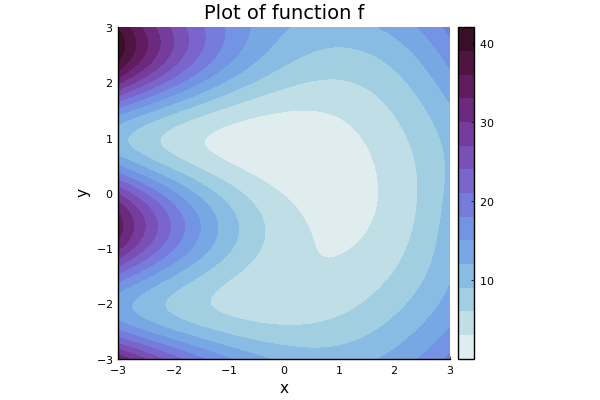

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [3]:
# For options of Plots.jl, see https://docs.juliaplots.org/latest/
using Plots
pyplot()
n = 100
x = range(-3, stop = 3, length=n)
y = range(-3, stop = 3, length=n)
X = repeat(x', n, 1) 
Y = repeat(y, 1, n) 

contourf(X, Y, f.(X,Y), title="Plot of function f", xlabel="x", ylabel="y", c=:dense, aspect_ratio=1)

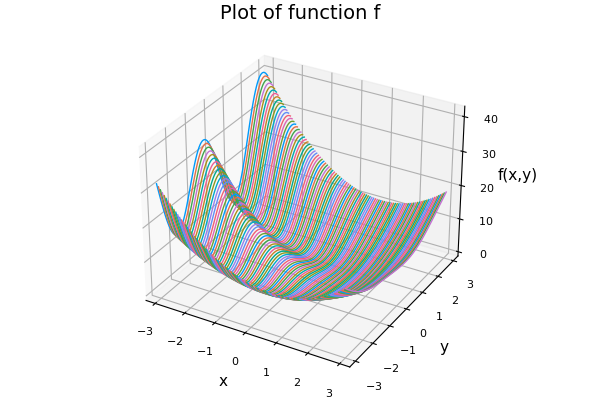

In [4]:
plot(X, Y, f.(X,Y), title="Plot of function f", xlabel="x", ylabel="y", zlabel="f(x,y)", legend=false)

### <span style="color:#00B8DE"> II - Backtracking </span>

In [5]:
# Gradient algorithm
# constant stepsize
#-------------------
using LinearAlgebra: norm
precision = 1.e-8 #1.e-3
max_iter  = 10e4
init      = [-4,-2] #[-5, -.5] 

# Constant stepsize
stepsize = 0.1
pt         = init
nb_const   = 0 # number of loops
resu_const = pt

while norm(pt-opt)>precision && nb_const<max_iter
    nb_const += 1
    pt = pt - stepsize * ∇f(pt[1],pt[2]) # Next pt with constant stepsize
    resu_const = [resu_const pt] # I add new point
end

In [6]:
# Backtracking
#-------------
function backtracking(x,f,∇f,d)
    """
    bactracking: 
    see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
    IN:
    ---
    x: initial point
    f, ∇f: function to be minimized and its gradient
    d: searc direction
    OUT:
    ----
    y: final point
    n: number of loops
    """
    α = 0.2
    β = 0.5
    t = 1 # 0.01 ?
    n = 0 
    
    while f(x[1] + t*d[1], x[2] + t*d[2]) > f(x[1], x[2]) + α*t*(∇f(x[1], x[2]))'*d
        n += 1
        t = β*t
    end
    
    y = x + t*d

    return y, n
    
end

backtracking (generic function with 1 method)

In [7]:
# Gradient algorithm
# with backtracking
#-------------------
pt             = init
nb_iter_grad   = 0  # number of loops
nb_loops_grad  = 0  # number of inner loops count for backtracking
resu_grad      = pt
while norm(pt-opt)>precision && nb_iter_grad<max_iter
    nb_iter_grad += 1
    pt, n = backtracking(pt,f,∇f,-∇f(pt[1], pt[2]))
    nb_loops_grad += n
    resu_grad = [resu_grad pt]
end

In [8]:
println("Error with constant stepsize: $(norm(resu_const[:,end]-opt))")
println("Number of iterations with constant stepsize: $nb_const\n\n")
    
println("Error with backtracking: $(norm(resu_grad[:,end]-opt))")
println("Number of iterations for backtracking= $nb_iter_grad")
println("Number of inner loops for backtracking = $nb_loops_grad")

Error with constant stepsize: 9.711428331416231e-9
Number of iterations with constant stepsize: 99


Error with backtracking: 7.040372927074278e-9
Number of iterations for backtracking= 24
Number of inner loops for backtracking = 56


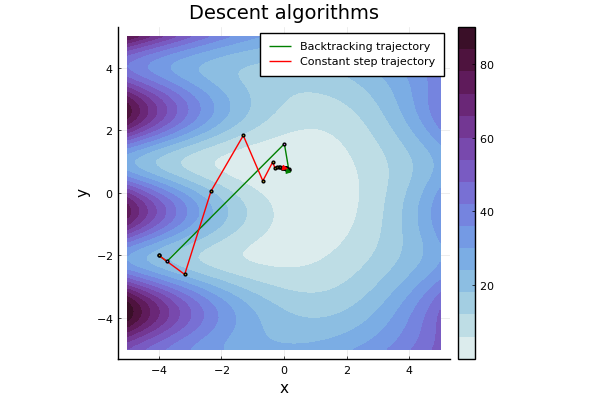

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [9]:
# Figure
n = 100
x = range(-5, stop = 5, length=n)
y = range(-5, stop = 5, length=n)
X = repeat(x', n, 1) 
Y = repeat(y, 1, n) 

contourf(X, Y, f.(X,Y), title="Descent algorithms", xlabel="x", ylabel="y", c=:dense, aspect_ratio=1)
plot!(resu_grad[1,:], resu_grad[2,:], color="green", label="Backtracking trajectory", arrow=true)
plot!(resu_const[1,:], resu_const[2,:], color="red", label="Constant step trajectory", arrow=true)
scatter!(resu_grad[1,:], resu_grad[2,:], label=false, markersize=2)
scatter!(resu_const[1,:], resu_const[2,:], label=false, markersize=2)


As we can se in the previous figure, with backtracking the number of iterations is less than in the case of a constant stepsize. For a value of 0.1, almost four times as many steps are required. But if the stepsize is 0.01 it iterates near 1500 times because the algorithm is not able to go from $(-4, -2)$ to the optimal point faster than that.

### <span style="color:#00B8DE"> III - Gradient and Newton </span>

In [10]:
# Newton algorithm (with backtracking)
#-------------------------------------
using LinearAlgebra: inv

∇2f(x,y) = [2*sin(y-1)^2+2 4*(x-2)*sin(y-1)*cos(y-1); 4*(x-2)*cos(y-1)*sin(y-1) 2*(x-2)^2*cos(2*y-2)+2]

pt        = init
nb_iter   = 0        # number of loops
nb_loops  = 0        # number of inner loops count for backtracking
resu_N    = pt
while norm(pt-opt)>precision && nb_iter<max_iter
    pt, n = backtracking(pt,f,∇f,-inv(∇2f(pt[1],pt[2]))*∇f(pt[1],pt[2]))
    nb_loops += n
    nb_iter += 1
    resu_N = [resu_N pt]
end

In [11]:
println("Error with Newton+backtracking: $(norm(resu_N[:,end]-opt))")
println("Number of iterations for Newton= $nb_iter")
println("Number of inner loops for Newton = $nb_loops")

Error with Newton+backtracking: 4.67013519195154e-12
Number of iterations for Newton= 9
Number of inner loops for Newton = 2


In [12]:
using LinearAlgebra: eigvals
println(eigvals(∇2f(init[1],init[2])))

[1.8774941004639487, 71.29459625171205]


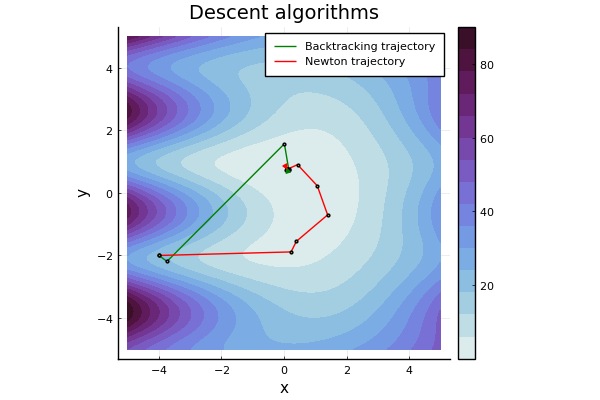

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [13]:
# Figure: gradient and Newton with backtracking

contourf(X, Y, f.(X,Y), title="Descent algorithms", xlabel="x", ylabel="y", c=:dense, aspect_ratio=1)
plot!(resu_grad[1,:], resu_grad[2,:], color="green", label="Backtracking trajectory", arrow=true)
plot!(resu_N[1,:], resu_N[2,:], color="red", label="Newton trajectory", arrow=true)
scatter!(resu_grad[1,:], resu_grad[2,:], label=false, markersize=2)
scatter!(resu_N[1,:], resu_N[2,:], label=false, markersize=2)

Newton arrives to the optimal point with an error of $10^{-12}$ very quickly (in comparison with the gradient algorithm with *backtracking*), in some cases not even entering to the *while* loop of the *backtracking* function. That explains that the number of iterations is greater that the number of inner loops. We will see in the final exercise that Newton may not converge if the initial conditions are different.

### <span style="color:#00B8DE"> IV - Conjugate gradient </span>

In [14]:
using LinearAlgebra: norm

A=[1 0;0 5]
b=[1,1]
p(x,y) = 0.5*[x,y]'*A*[x,y] - b'*[x,y]
∇p(x,y) = 0.5*(A + A')*[x,y] - b
opt= 2*inv(A + A')*b


2-element Vector{Float64}:
 1.0
 0.2

In [15]:
precision = 1.e-8
max_iter  = 10e4
init      = [-2, 3] #[-5, -.5]

# optimal stepsize
pt            = init
nb_opt_grad   = 0 # number of loops
resu_opt_grad = pt
while norm(pt-opt)>precision && nb_opt_grad<max_iter
    nb_opt_grad  += 1;
    pt,n = backtracking(pt,p,∇p,-∇p(pt[1],pt[2]));
    resu_opt_grad = [resu_opt_grad pt];
end

In [16]:
println("Error with gradient with optimal stepsize: $(norm(resu_opt_grad[:,end]-opt))")
println("Number of iterations = $nb_opt_grad")

Error with gradient with optimal stepsize: 3.763577532955864e-9
Number of iterations = 40


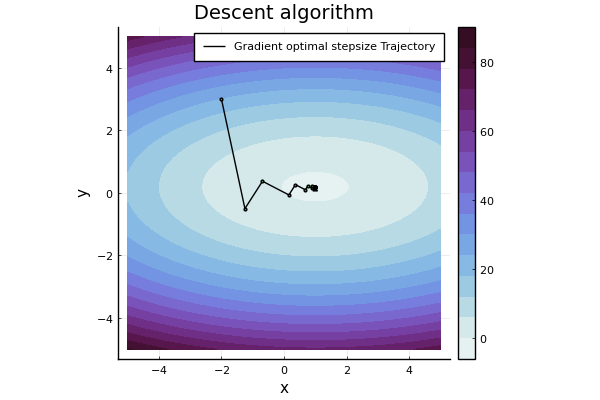

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [17]:
# For options of Plots.jl, see https://docs.juliaplots.org/latest/
contourf(X, Y, p.(X,Y), title="Descent algorithm", xlabel="x", ylabel="y", c=:dense, aspect_ratio=1)
plot!(resu_opt_grad[1,:], resu_opt_grad[2,:], color="black", label="Gradient optimal stepsize Trajectory", arrow=true)
scatter!(resu_opt_grad[1,:], resu_opt_grad[2,:], label=false, markersize=2)

In [18]:
# Conjugate gradient
#--------------------
pt          = init
nb_iter_CG  = 0        # number of iterations
nb_loops_CG = 0        # number of inner loops count for backtracking
err_CG      = norm(pt-opt)
resu_CG = pt

# initialization
d = -∇p(pt[1], pt[2])
            
# iterations
for k = 1:2
    g = ∇p(pt[1],pt[2])
    α = -g'*d/(d'*A*d)
    pt = pt + α * d
    
    g_next = ∇p(pt[1],pt[2])
    β = g_next'*A*d /(d'*A*d)
    d = -g_next + β * d
    
    resu_CG = [resu_CG pt]
    nb_iter_CG += 1
    err_CG = [err_CG norm(pt-opt)]
end

In [19]:
println("Error with CG: $(err_CG[end])")
println("Error number of iterations with CG: $(size(resu_CG)[2])")

Error with CG: 4.47545209131181e-16
Error number of iterations with CG: 3


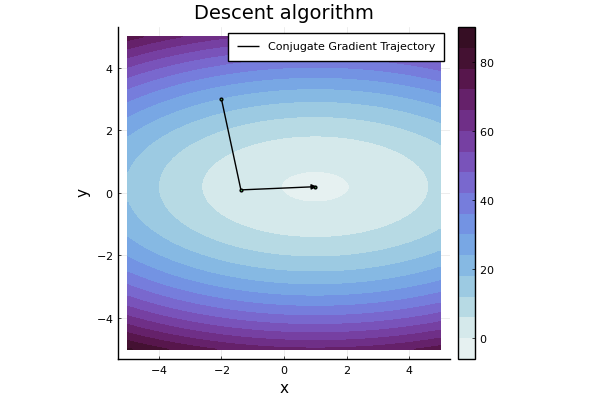

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [20]:
# Figure: gradient with optimal step
contourf(X, Y, p.(X,Y), title="Descent algorithm", xlabel="x", ylabel="y", c=:dense, aspect_ratio=1)
plot!(resu_CG[1,:], resu_CG[2,:], color="black", label="Conjugate Gradient Trajectory", arrow=true)
scatter!(resu_CG[1,:], resu_CG[2,:], label=false, markersize=2)

For this exercise the Conjugate Gradient algorithm has a lower error than the gradient with optimal stepsize method. Also, it requires about ten times fewer iterations.

### A larger problem

29.657561805604097


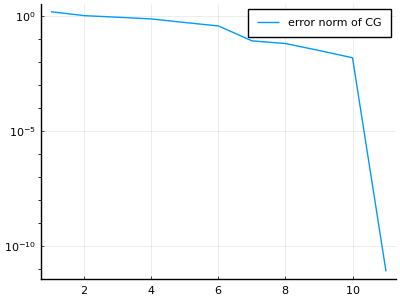

In [21]:
using LinearAlgebra: cond, diagm

n = 10 # 100
A = randn(n,n)
A = A'*A + diagm(0=>ones(n)) # without the second term
println(cond(A))
b = randn(n)
opt = 2*inv(A + A')*b

pt          = randn(n)
err_CG      = norm(pt.-opt)
resu_CG = pt

# initialization
d = b - A * pt
            
# iterations
for k = 1:n
    g = A * pt - b
    α = -g'*d/(d'*A*d)
    pt = pt + α * d
    
    g_next = A * pt - b
    β = g_next'*A*d/(d'*A*d)
    d = -g_next + β * d
    
    resu_CG = [resu_CG pt]
    err_CG = [err_CG;norm(pt.-opt)]
end
plot(err_CG/norm(opt),yscale=:log10,label="error norm of CG",size=(400,300))

**Answer:** Cond(n=10, with diagm) < Cond(n=100, with diagm) < Cond(n=10, without diagm) < Cond(n=100, without diagm)

### <span style="color:#00B8DE"> V - Polak-Ribière </span>

#### <span style="color:#00B8DE">Polack-Ribière method</span>

Initialization: 

> 1. initialize ${\bf x_0}$ and calculate $\Delta {\bf x_0}$, where $\Delta {\bf x_n}= - \nabla f ({\bf x_n})$ 
> 2. $\alpha_0 = \arg \min_\alpha f({\bf x_0}+\alpha \Delta {\bf x_0})$
> 3. ${\bf x_1}={\bf x_0}+\alpha_0 \Delta {\bf x_0}$

Iterations: 

> 1. $\beta_{n} = \frac{\nabla f ({\bf x_n})^{\top} (\nabla f ( {\bf x_n})-\nabla f ({\bf x_{n-1}}))} {\nabla f ({\bf x_{n-1})^{\top}} \nabla f ({\bf x_{n-1}})}$
> 2. ${\bf d_n}= -\nabla f ({\bf x_n})+\beta_n {\bf d_{n-1}}$
> 3. $\alpha_n=\arg \min_{\alpha} f({\bf x_n}+\alpha {\bf d_n})$
> 4. ${\bf x_{n+1}}={\bf x_n}+\alpha_{n} {\bf d_n}$


In [22]:
# Polak-Ribière
#---------------
pt = [-4, -2] # [-5, -.5] 
opt = [0.09172811859570773, 0.7789586896619789]
nb_iter_PR  = 0        # number of iterations
nb_loops_PR = 0        # number of inner loops count for backtracking
resu_PR     = pt

# initialization
d = -∇f(pt[1],pt[2])
pt_last = pt
pt, n = backtracking(pt,f,∇f,d)
nb_loops_PR += n
resu_PR = [resu_PR pt]

# iterations
while norm(pt-opt)>precision && nb_iter_PR<max_iter
    g = ∇f(pt[1],pt[2])
    g_last = ∇f(pt_last[1],pt_last[2])
    β = g'*(g-g_last)/((g_last)'*g_last)    
    d = -g + β * d
    pt_last = pt
    pt, n = backtracking(pt,f,∇f,d)
    nb_loops_PR += n
    resu_PR = [resu_PR pt]
    nb_iter_PR += 1
end

In [23]:
println("Error with gradient = $(norm(resu_grad[:,end]-opt))")
println("Number of iterations = $nb_iter_grad")
println("Number of inner loops = $nb_loops_grad\n")

println("Error with Polack-Ribière = $(norm(resu_PR[:,end]-opt))")
println("Number of iterations = $nb_iter_PR")
println("Number of inner loops = $nb_loops_PR")

Error with gradient = 7.040372927074278e-9
Number of iterations = 24
Number of inner loops = 56

Error with Polack-Ribière = 2.656440328037085e-9
Number of iterations = 23
Number of inner loops = 144


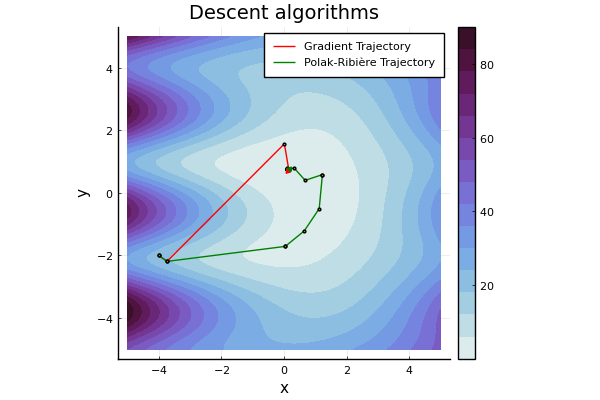

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [24]:
#Figure: Gradient and Polack-Ribière (with backtraking)

contourf(X, Y, f.(X,Y), title="Descent algorithms", xlabel="x", ylabel="y", c=:dense, aspect_ratio=1)
plot!(resu_grad[1,:], resu_grad[2,:], color="red", label="Gradient Trajectory", arrow=true)
plot!(resu_PR[1,:], resu_PR[2,:], color="green", label="Polak-Ribière Trajectory", arrow=true)
scatter!(resu_grad[1,:], resu_grad[2,:], label=false, markersize=2)
scatter!(resu_PR[1,:], resu_PR[2,:], label=false, markersize=2)

The number of iterations is similar between the two algorithms, but the trajectories are completely different. Furthermore, more *while* loops inside the *backtracking* function are required in Polak-Ribière.

### <span style="color:#00B8DE"> VI - Changing initialization </span>


With $(-5,-0.5)$ as initial condition every algorithm except from Newton's (which needs the computation of the Hessian matrix  - and note that this last case **it is not definite-positive**) maintains its performance for this problem. So it is decisive which is the initial condition when using Newton.

It is important to take into account that there is no method that guarantees the convergence to the global minimum in a non-convex problem. In other words, the final step may correspond to a local minimum.

Error with Newton+backtracking: 1.5220521770432691
Number of iterations for Newton= 100000
Number of inner loops for Newton = 5899936
[-20.438112243926295, 5.175159997154323]


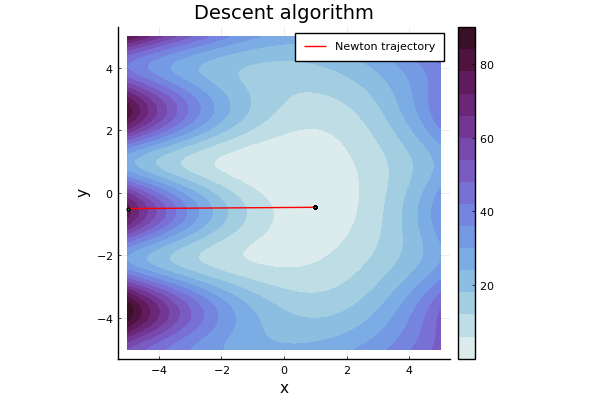

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [25]:
pt        = [-5, -.5]
nb_iter   = 0        # number of loops
nb_loops  = 0        # number of inner loops count for backtracking
resu_N    = pt
while norm(pt-opt)>precision && nb_iter<max_iter
    pt, n = backtracking(pt,f,∇f,-inv(∇2f(pt[1],pt[2]))*∇f(pt[1],pt[2]))
    nb_loops += n
    nb_iter += 1
    resu_N = [resu_N pt]
end

println("Error with Newton+backtracking: $(norm(resu_N[:,end]-opt))")
println("Number of iterations for Newton= $nb_iter")
println("Number of inner loops for Newton = $nb_loops")

println(eigvals(∇2f(init[1],init[2]))) # notice that the first eigenvalue is negative

contourf(X, Y, f.(X,Y), title="Descent algorithm", xlabel="x", ylabel="y", c=:dense, aspect_ratio=1)
plot!(resu_N[1,:], resu_N[2,:], color="red", label="Newton trajectory", arrow=true)
scatter!(resu_N[1,:], resu_N[2,:], label=false, markersize=2)